## [채무 상환] : 상환 여부를 예측하기 위한 랜덤포레스트 분석을 실시하고 결과를 해석하시오.

In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz

import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [6]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= 'Malgun Gothic')
import warnings
warnings.filterwarnings('ignore')

In [69]:
#한글사용

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_manager.get_fontconfig_fonts()

fontname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname)

### 1. 데이터 구성하기

In [5]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2/HMEQ.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


*결측치 처리*

In [7]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [8]:
#JOB 변수의 결측치는 other 로 대체
df_raw['JOB'].fillna('Other', inplace = True) #fillna 함수 적용 후 df_raw 데이터에 저장 : inplace = True

#숫자형 변수의 결측치는 평균값 입력
df_raw.fillna(df_raw.mean(), inplace=True)

In [10]:
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

*더미변수 생성*

In [11]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


*데이터 분할*

In [12]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy['BAD']
df_raw_x = df_raw_dummy.drop('BAD',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


### 2. 모델 생성

In [15]:
#기본옵션으로 모델 생성
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set:{:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.991
Accuracy on test set:0.953


In [17]:
rf_uncustomized

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [19]:
#모델 parameter 조정 : n_estimators : 트리 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [20]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.991,0.953
1,20,0.997,0.955
2,30,0.998,0.955
3,40,1.000,0.955
4,50,1.000,0.955
5,60,1.000,0.956
6,70,1.000,0.955
7,80,1.000,0.954
8,90,1.000,0.953
9,100,1.000,0.952


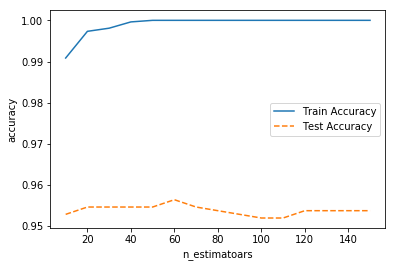

In [22]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('n_estimatoars'); plt.ylabel('accuracy')
plt.legend()

생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며 train/test 데이터의 성능 변화를 고려하여 40을 선택한다. test 데이터의 성능 변화를 고려하면 60을 선택할 수 있다. OOB를 이용한 적정 나무 확인이 가능하다.

In [23]:
#n_estimators : 트리수 변경에 따른 OOB error 변화
oob_error = []

for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

Text(0.5, 0, 'n_estimators')

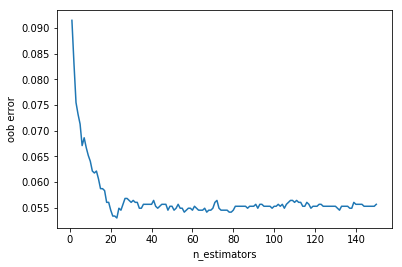

In [24]:
plt.plot(range(1,151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [25]:
# 트리 수 지정
n_estimators = 70

생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가한다. (OOB 에러는 감소) 모델의 특성을 고려하여 60을 선택한다.

In [27]:
#max_depth : 최대 깊이 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth = v_max_depth, n_estimators = 60, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [28]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.905,0.916
1,2,0.910,0.921
2,3,0.925,0.931
3,4,0.929,0.933
4,5,0.932,0.938
5,6,0.934,0.940
6,7,0.936,0.941
7,8,0.939,0.941
8,9,0.944,0.941
9,10,0.950,0.945


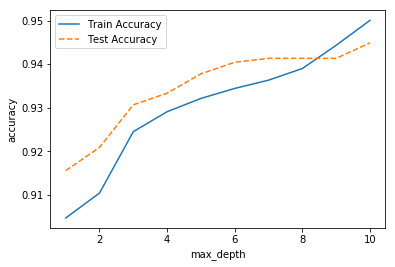

In [29]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('max_depth'); plt.ylabel('accuracy')
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가하며 train/test데이터의 성능 변화를 고려하여 9를 선택한다.

In [30]:
max_depth = 9

In [34]:
#min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy =[]; test_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf=RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth=9,
                             n_estimators=60, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [35]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.942,0.944
1,20,0.937,0.940
2,30,0.937,0.940
3,40,0.935,0.941
4,50,0.935,0.940
5,60,0.934,0.940
6,70,0.934,0.940
7,80,0.933,0.940
8,90,0.932,0.939
9,100,0.931,0.939


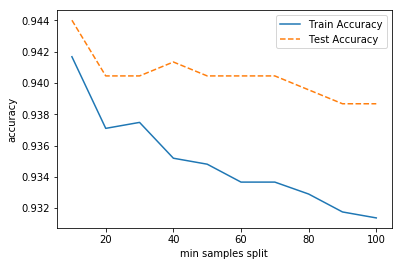

In [36]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며, train/test 데이터의 성능 변화를 고려하여 20 선택

In [42]:
train_accuracy =[]; test_accuracy =[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split=20,
                             max_depth =4, n_estimators =60, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [43]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.925,0.931
1,20,0.924,0.930
2,30,0.924,0.931
3,40,0.921,0.928
4,50,0.905,0.916
5,60,0.905,0.916
6,70,0.905,0.916
7,80,0.905,0.916
8,90,0.905,0.916
9,100,0.905,0.916


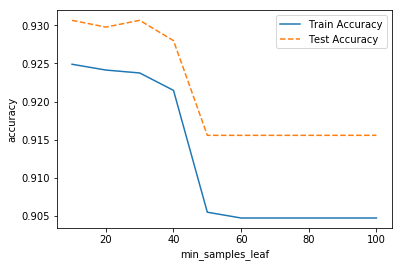

In [44]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label="Train Accuracy" )
plt.plot(para_leaf, test_accuracy, linestyle='--', label="Test Accuracy" )
plt.xlabel('min_samples_leaf'); plt.ylabel('accuracy')
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 train/test 데이터의 성능 변화를 고려하여 20을 선택

### 3. 결론 도출

In [47]:
rf_final = RandomForestClassifier(min_samples_leaf = 20, min_samples_split = 20, max_depth=4,
                                 n_estimators=60, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print('Accuracy on training set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
print('Confusion Matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.924
Accuracy on test set:0.930
Confusion Matrix:
[[1030    0]
 [  79   16]]


train/test 데이터의 정분류율이 매우 비슷한 수준으로 안정적인 모델임을 확인할 수 있다.

In [49]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.473
5,DELINQ,0.136
4,DEROG,0.075
6,CLAGE,0.064
7,NINQ,0.053
2,VALUE,0.051
8,CLNO,0.047
0,LOAN,0.032
1,MORTDUE,0.025
16,JOB_Sales,0.012


Text(0, 0.5, '변수')

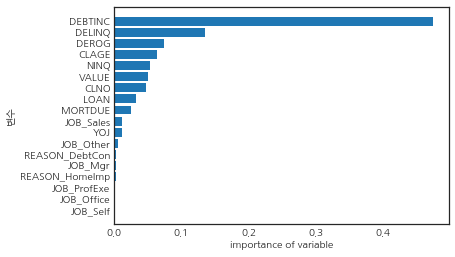

In [68]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('importance of variable')
plt.ylabel('변수')